# 2023 Data Analysis

In [3]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set()

# import utility functions
import sys
sys.path.append('../')
from src.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [4]:
# load the 2023 data
df = get_data(2023)

Breakdown by Outlier Condition:
	Outlier Rents: 5461 (30%)
	Outlier Increase vs Base: 608 ( 3%)
	Outlier Increase vs Previous: 328 ( 2%)
	Overall: 5905 (33%)

Breakdown by Subset:
	5905 outliers (33%)
	12081 non-outliers (67%)


	8567 rent increase (48%)
	9419 no rent increase (52%)


	7146 exempt (40%)
	10840 not exempt (60%)


# Outliers Removed

Text(0.5, 1.0, 'Rents by Number of Bedrooms, All Registered Units*')

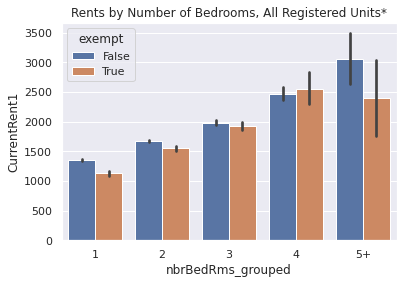

In [5]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, All Registered Units*")

Text(0.5, 1.0, 'Rent Increase Percentages by Number of Bedrooms, All Registered Units*')

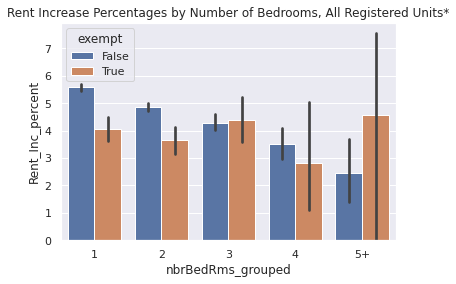

In [6]:
ax = sns.barplot(
    data=df[~df["outlier"]].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rent Increase Percentages by Number of Bedrooms, All Registered Units*")

Text(0.5, 1.0, 'Rents by Number of Bedrooms, Only Units that Increased Rents*')

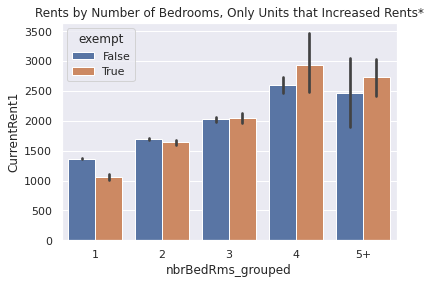

In [7]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, Only Units that Increased Rents*")

Text(0.5, 1.0, 'Rents Increase Percentages by Number of Bedrooms, Only Units that Increased Rents*')

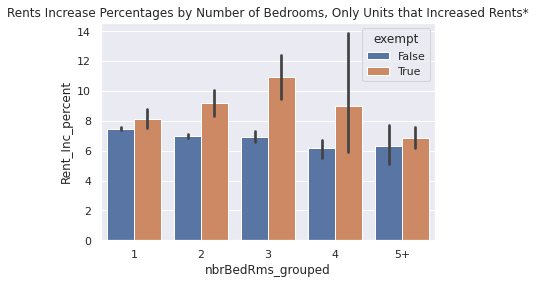

In [8]:
ax = sns.barplot(
    data=df[~df["outlier"] & (df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rents Increase Percentages by Number of Bedrooms, Only Units that Increased Rents*")

# Outliers Included

Text(0.5, 1.0, 'Rents by Number of Bedrooms, All Registered Units')

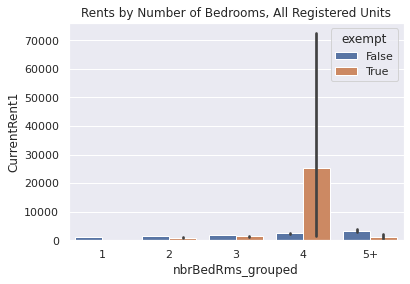

In [9]:
ax = sns.barplot(
    data=df.sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, All Registered Units")

Text(0.5, 1.0, 'Rent Increase Percentages by Number of Bedrooms, All Registered Units')

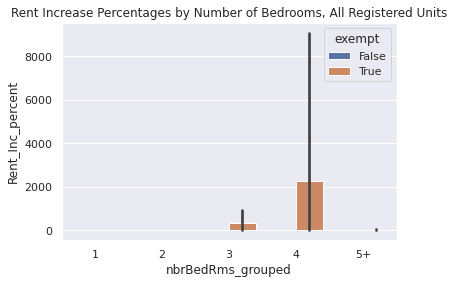

In [10]:
ax = sns.barplot(
    data=df.sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rent Increase Percentages by Number of Bedrooms, All Registered Units")

Text(0.5, 1.0, 'Rents by Number of Bedrooms, Only Units that Increased Rents')

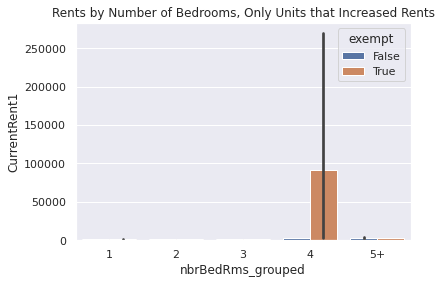

In [11]:
ax = sns.barplot(
    data=df[df["Rent_Inc"] > 0].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="CurrentRent1",
    hue="exempt"
    )
ax.set_title("Rents by Number of Bedrooms, Only Units that Increased Rents")

Text(0.5, 1.0, 'Rents Increase Percentages by Number of Bedrooms, Only Units that Increased Rents')

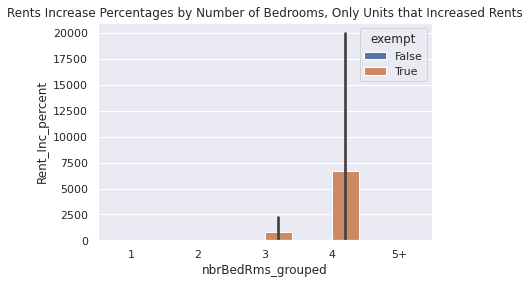

In [12]:
ax = sns.barplot(
    data=df[(df["Rent_Inc"] > 0)].sort_values("nbrBedRms_grouped"),
    x="nbrBedRms_grouped",
    y="Rent_Inc_percent",
    hue="exempt"
    )
ax.set_title("Rents Increase Percentages by Number of Bedrooms, Only Units that Increased Rents")